<a href="https://colab.research.google.com/github/custom-hyper/Trading-Report/blob/main/Trading_Report_2024-10-12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archive:

In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')
#@title
!pip install statistics --quiet
!pip install yfinance --quiet
!pip install pytrends --quiet
!pip install pycoingecko --quiet
!pip install pandas --quiet
!pip install Backtesting --quiet
!pip install mplfinance --quiet
!pip install configparser --quiet
!pip install psycopg2-binary==2.8.6 --quiet
!pip install tweepy==4.10.1 --quiet



Mounted at /content/drive
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.7/384.7 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.8 MB/s eta 0:00:00


In [2]:
#@title Import Project  Dependencies { display-mode: "code" }
import requests
import mplfinance as fplt
from datetime import datetime as dt
from datetime import timedelta
from datetime import date

import time
import json
import seaborn as sns
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import sys
from tqdm.notebook import tqdm
import os
import sqlite3 as sq
import psycopg2 as pg
import configparser
from sqlalchemy import create_engine
from pycoingecko import CoinGeckoAPI
import numpy as np
#from __future__ import division

In [3]:
# @title
# Set dark background style using seaborn and override with black for Matplotlib
sns.set(style="dark")
plt.style.use('dark_background')

Highlights

# Search

In [4]:

CoinGecko_id = "SOL" #@param {type:"string"}
yahoo_id = "COIN"
Google_trend_search = 'Donald Trump'

# Big  Picture

            Bitcoin  Ethereum  Crypto  Solana  isPartial
date                                                    
2024-08-04       33         5       9       3      False
2024-08-11       22         3       8       2      False
2024-08-18       20         3       8       2      False
2024-08-25       18         3       8       2      False
2024-09-01       19         3       8       2      False
2024-09-08       18         2       7       1      False
2024-09-15       19         3       8       2      False
2024-09-22       19         2       9       2      False
2024-09-29       18         2       8       2      False
2024-10-06       17         2       7       2       True


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
<ipython-input-5-6fca43a3ce43>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y1" (-> marker='1'). The keyword argument will take precedence.
  plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
<ipython-input-5-6fca43a3ce43>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y1" (-> color='y'). The keyword argument will take precedence.
  plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
<ipython-input-5-6fca43a3ce43>:24: UserWarning: marker is re

Text(0.5, 1.0, 'Google Trends')

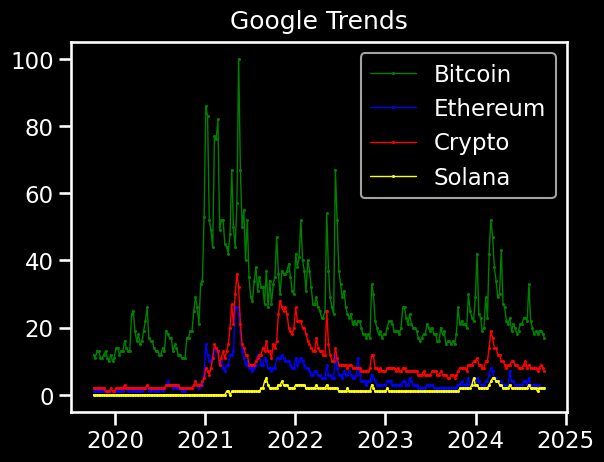

In [5]:
#@title Crypto + Meme

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['Bitcoin', 'Ethereum','Crypto','Solana'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Crypto', 'y3', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Solana', 'y4', data=df, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )
#plt.plot( 'Cosmos Crypto', 'y5', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.legend()


# title
plt.title('Google Trends', loc='center',pad=10)



In [6]:
#@title
#@title Crypto Fear & Greed Index

import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.alternative.me/fng/?limit=0")
output = response.text
json_parsed = json.loads(output)

df = pd.json_normalize(json_parsed)


df1 = pd.concat([pd.json_normalize(x) for x in df['data'].values.tolist()])
timeseries = df1['timestamp']
df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')

df_fear_greed = pd.concat([df1['date'], df1['value']], axis=1)
df3 = pd.concat([df1['date'], df1['value_classification']])

<ipython-input-6-9be12f6d63b7>:27: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')


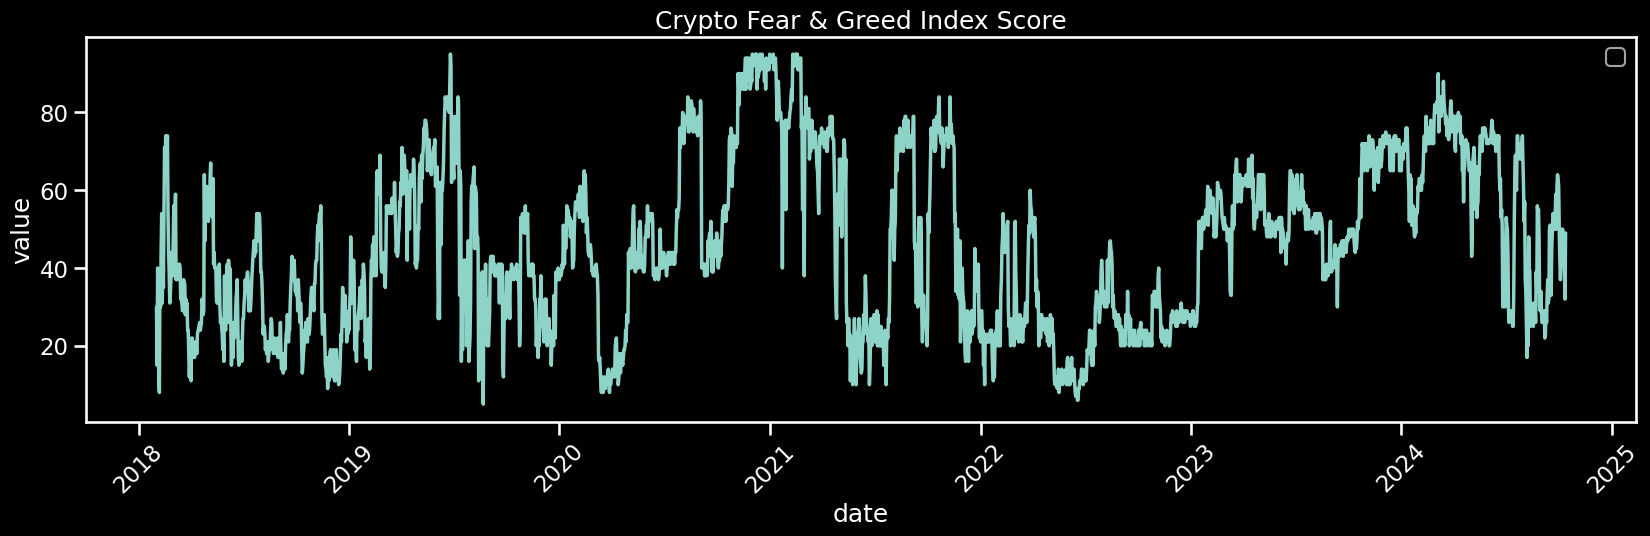

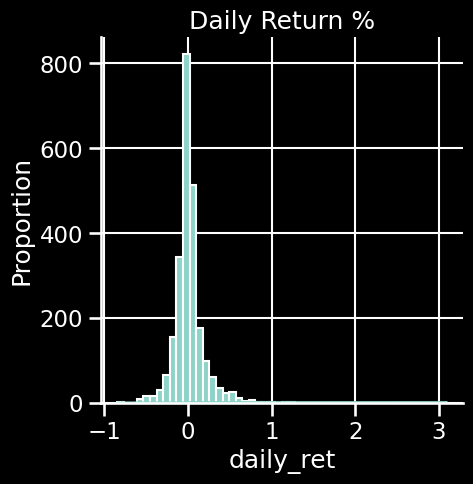

In [7]:
#@title
#@title


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("dark_background")
#sns.set_theme(style="darkgrid")

#Choose the date range
df_fear_greed = df_fear_greed[(df_fear_greed['date'] > '2016-04-01')]

df_fear_greed['value'] = df_fear_greed['value'].astype(int)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(df_fear_greed=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')

plt.xticks(rotation=45)

plt.legend()


df_fear_greed.head(1)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_fear_greed['daily_ret'] = df_fear_greed['value'].pct_change(1)

ECDF = sns.displot(df_fear_greed, x="daily_ret", kind="ecdf")

Histogram = df_fear_greed['daily_ret'].hist(bins = 50)


plt.title('Daily Return %')

plt.show()

# Technical Analysis

In [8]:
#@title S&P 500
import yfinance as yf
import plotly.graph_objects as go


ticker='SPY'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['longName']


data = yf.download(tickers=ticker, period='1y')


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed



Related News – ^VIX

– Stock Market News for Oct 10, 2024
– Stock Market News for Oct 9, 2024
– Stock Market News for Oct 8, 2024
– Stocks End Lower After Jump in Bond Yields and Oil. The Dow Shed 400 Points.
– US Equity Indexes Retreat as Reports of Upcoming Iran-Russia Meeting Sends Crude Oil Sharply Higher
– US Equity Indexes Decline, Crude Oil Jumps Amid Middle East Turmoil
– Stocks Are Down. The 10-Year Treasury and Oil Prices Are Up. What's Going On?


/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


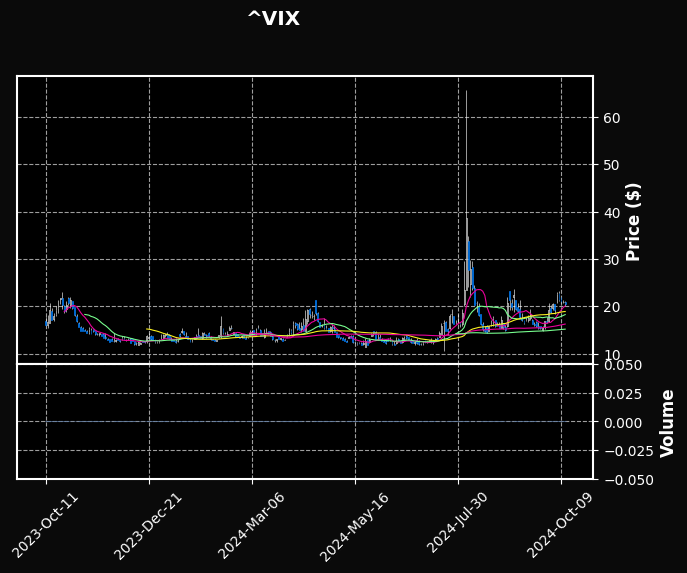

Text(0.5, 1.0, 'Daily Return %')

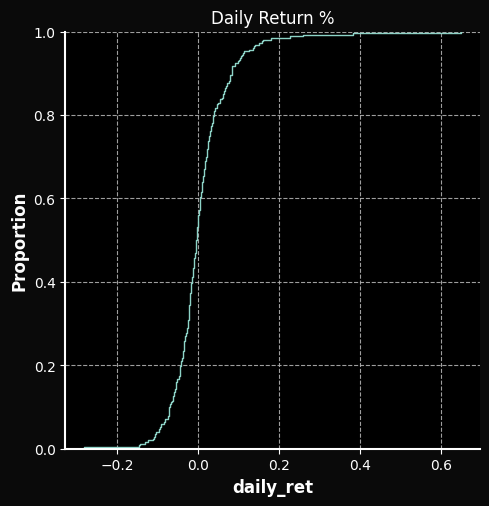

In [9]:
#@title  VIX
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='^VIX'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['Ticker']

data = yf.download(tickers=ticker, period='1y')
print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")


plt.title('Daily Return %')

[*********************100%***********************]  1 of 1 completed



Related News – BTC-USD

– Perpetua Resources Corp (PPTA) is Investing in the Future
– Root, Inc. (ROOT): Revolutionizing Insurance with Data-Driven Technology
– Dave Inc.: A Rising Small Cap Star in the Fintech Market
– SoundHound AI, Inc (SOUN): A Small-Cap Powerhouse in Voice Technology
– Stoke Therapeutics, Inc (STOK): Pioneering RNA Medicine for Genetic Diseases
– Centessa Pharmaceuticals Plc (CNTA): A Small-Cap Leader in Clinical-Stage Biotech
– Perspective Therapeutics, Inc (CATX): A Small-Cap Pioneer in Targeted Cancer Therapies


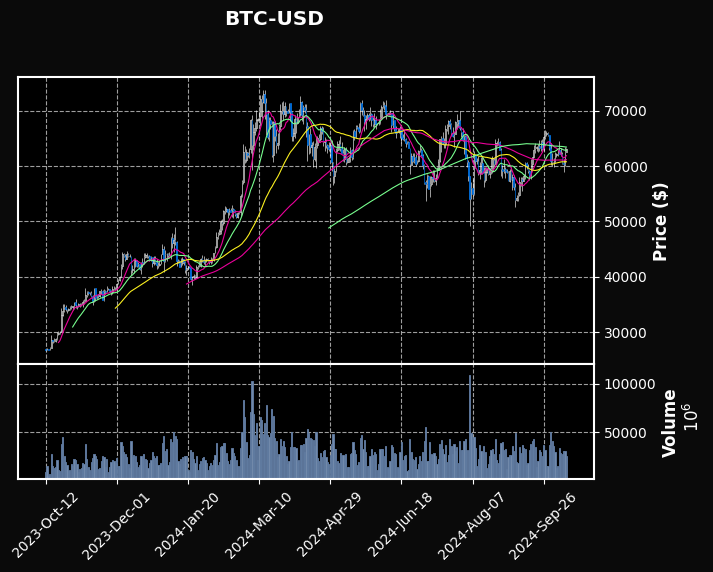

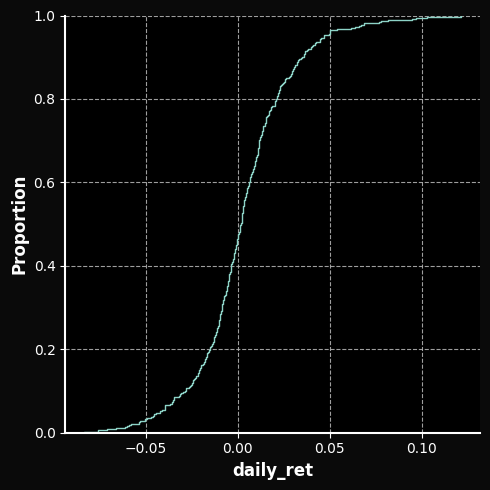

In [10]:
#@title Bitcoin
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='BTC-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='1y')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )
data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed



Related News – ETH-USD

– Perpetua Resources Corp (PPTA) is Investing in the Future
– Root, Inc. (ROOT): Revolutionizing Insurance with Data-Driven Technology
– Dave Inc.: A Rising Small Cap Star in the Fintech Market
– SoundHound AI, Inc (SOUN): A Small-Cap Powerhouse in Voice Technology
– Stoke Therapeutics, Inc (STOK): Pioneering RNA Medicine for Genetic Diseases
– Centessa Pharmaceuticals Plc (CNTA): A Small-Cap Leader in Clinical-Stage Biotech
– Perspective Therapeutics, Inc (CATX): A Small-Cap Pioneer in Targeted Cancer Therapies


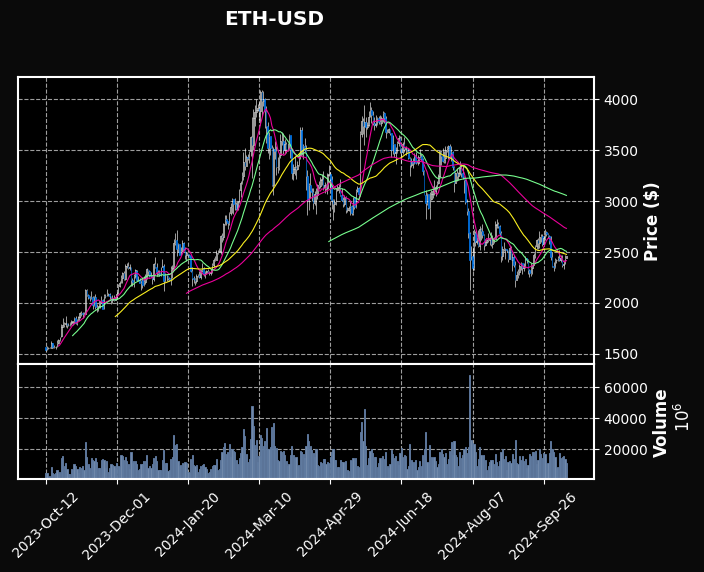

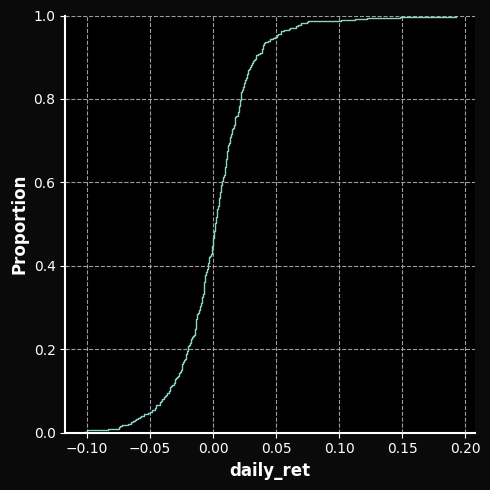

In [11]:
#@title Ethereum
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='ETH-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='1y')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass


fplt.plot(
            data,
            type='candle',
            style='mike',
            title =ticker,
            ylabel='Price ($)',
            volume=True,
            mav = (10,20,50,100,200),
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-12-eac4c65c0492>:34: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df_pivot.pct_change().dropna()


<Figure size 640x480 with 0 Axes>

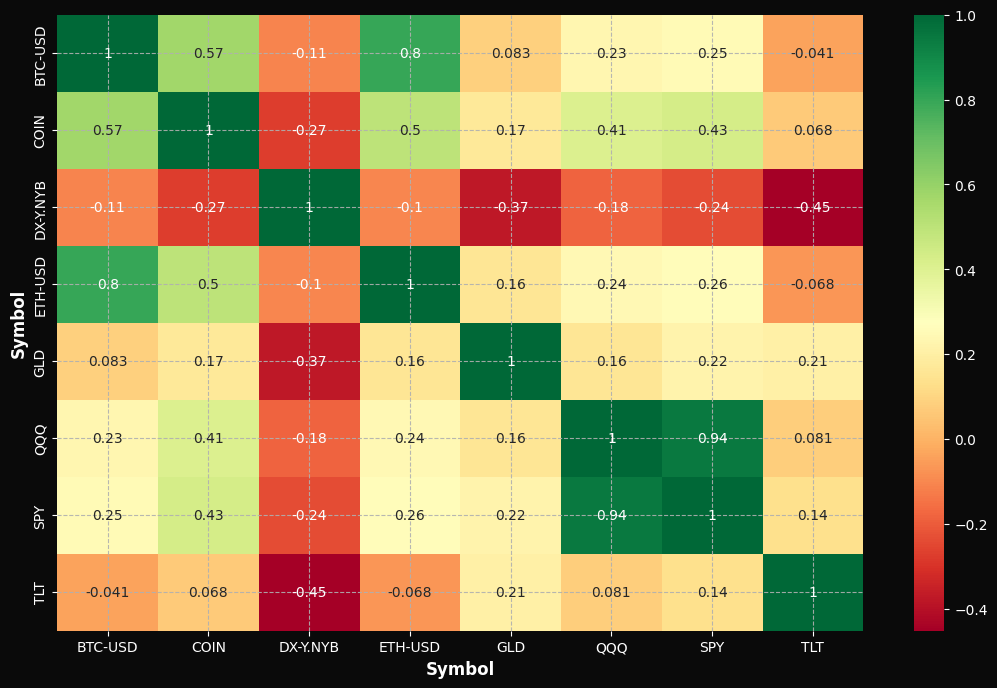

<Figure size 640x480 with 0 Axes>

In [12]:
#@title Correlation

import numpy as np
import pandas as pd
# Used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
# To visualize the results
import matplotlib.pyplot as plt
import seaborn

start = datetime(2022,9, 1)
symbols_list = [yahoo_id,'SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DX-Y.NYB', 'GLD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:

    r = yf.download(tickers=ticker, period='1y')
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]

#df_pivot=df.pivot('Date','Symbol','Adj Close')#.reset_index()

# Calculate the percentage change (price returns) for each stock
df_pivot = df.pivot(index='Date', columns='Symbol', values='Adj Close')
returns = df_pivot.pct_change().dropna()
corr_df = returns.corr(method='pearson')

#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

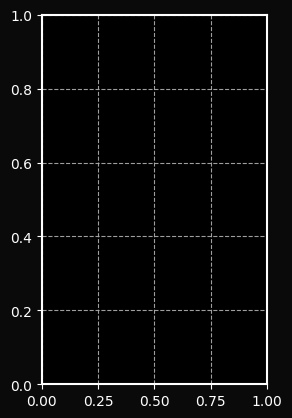

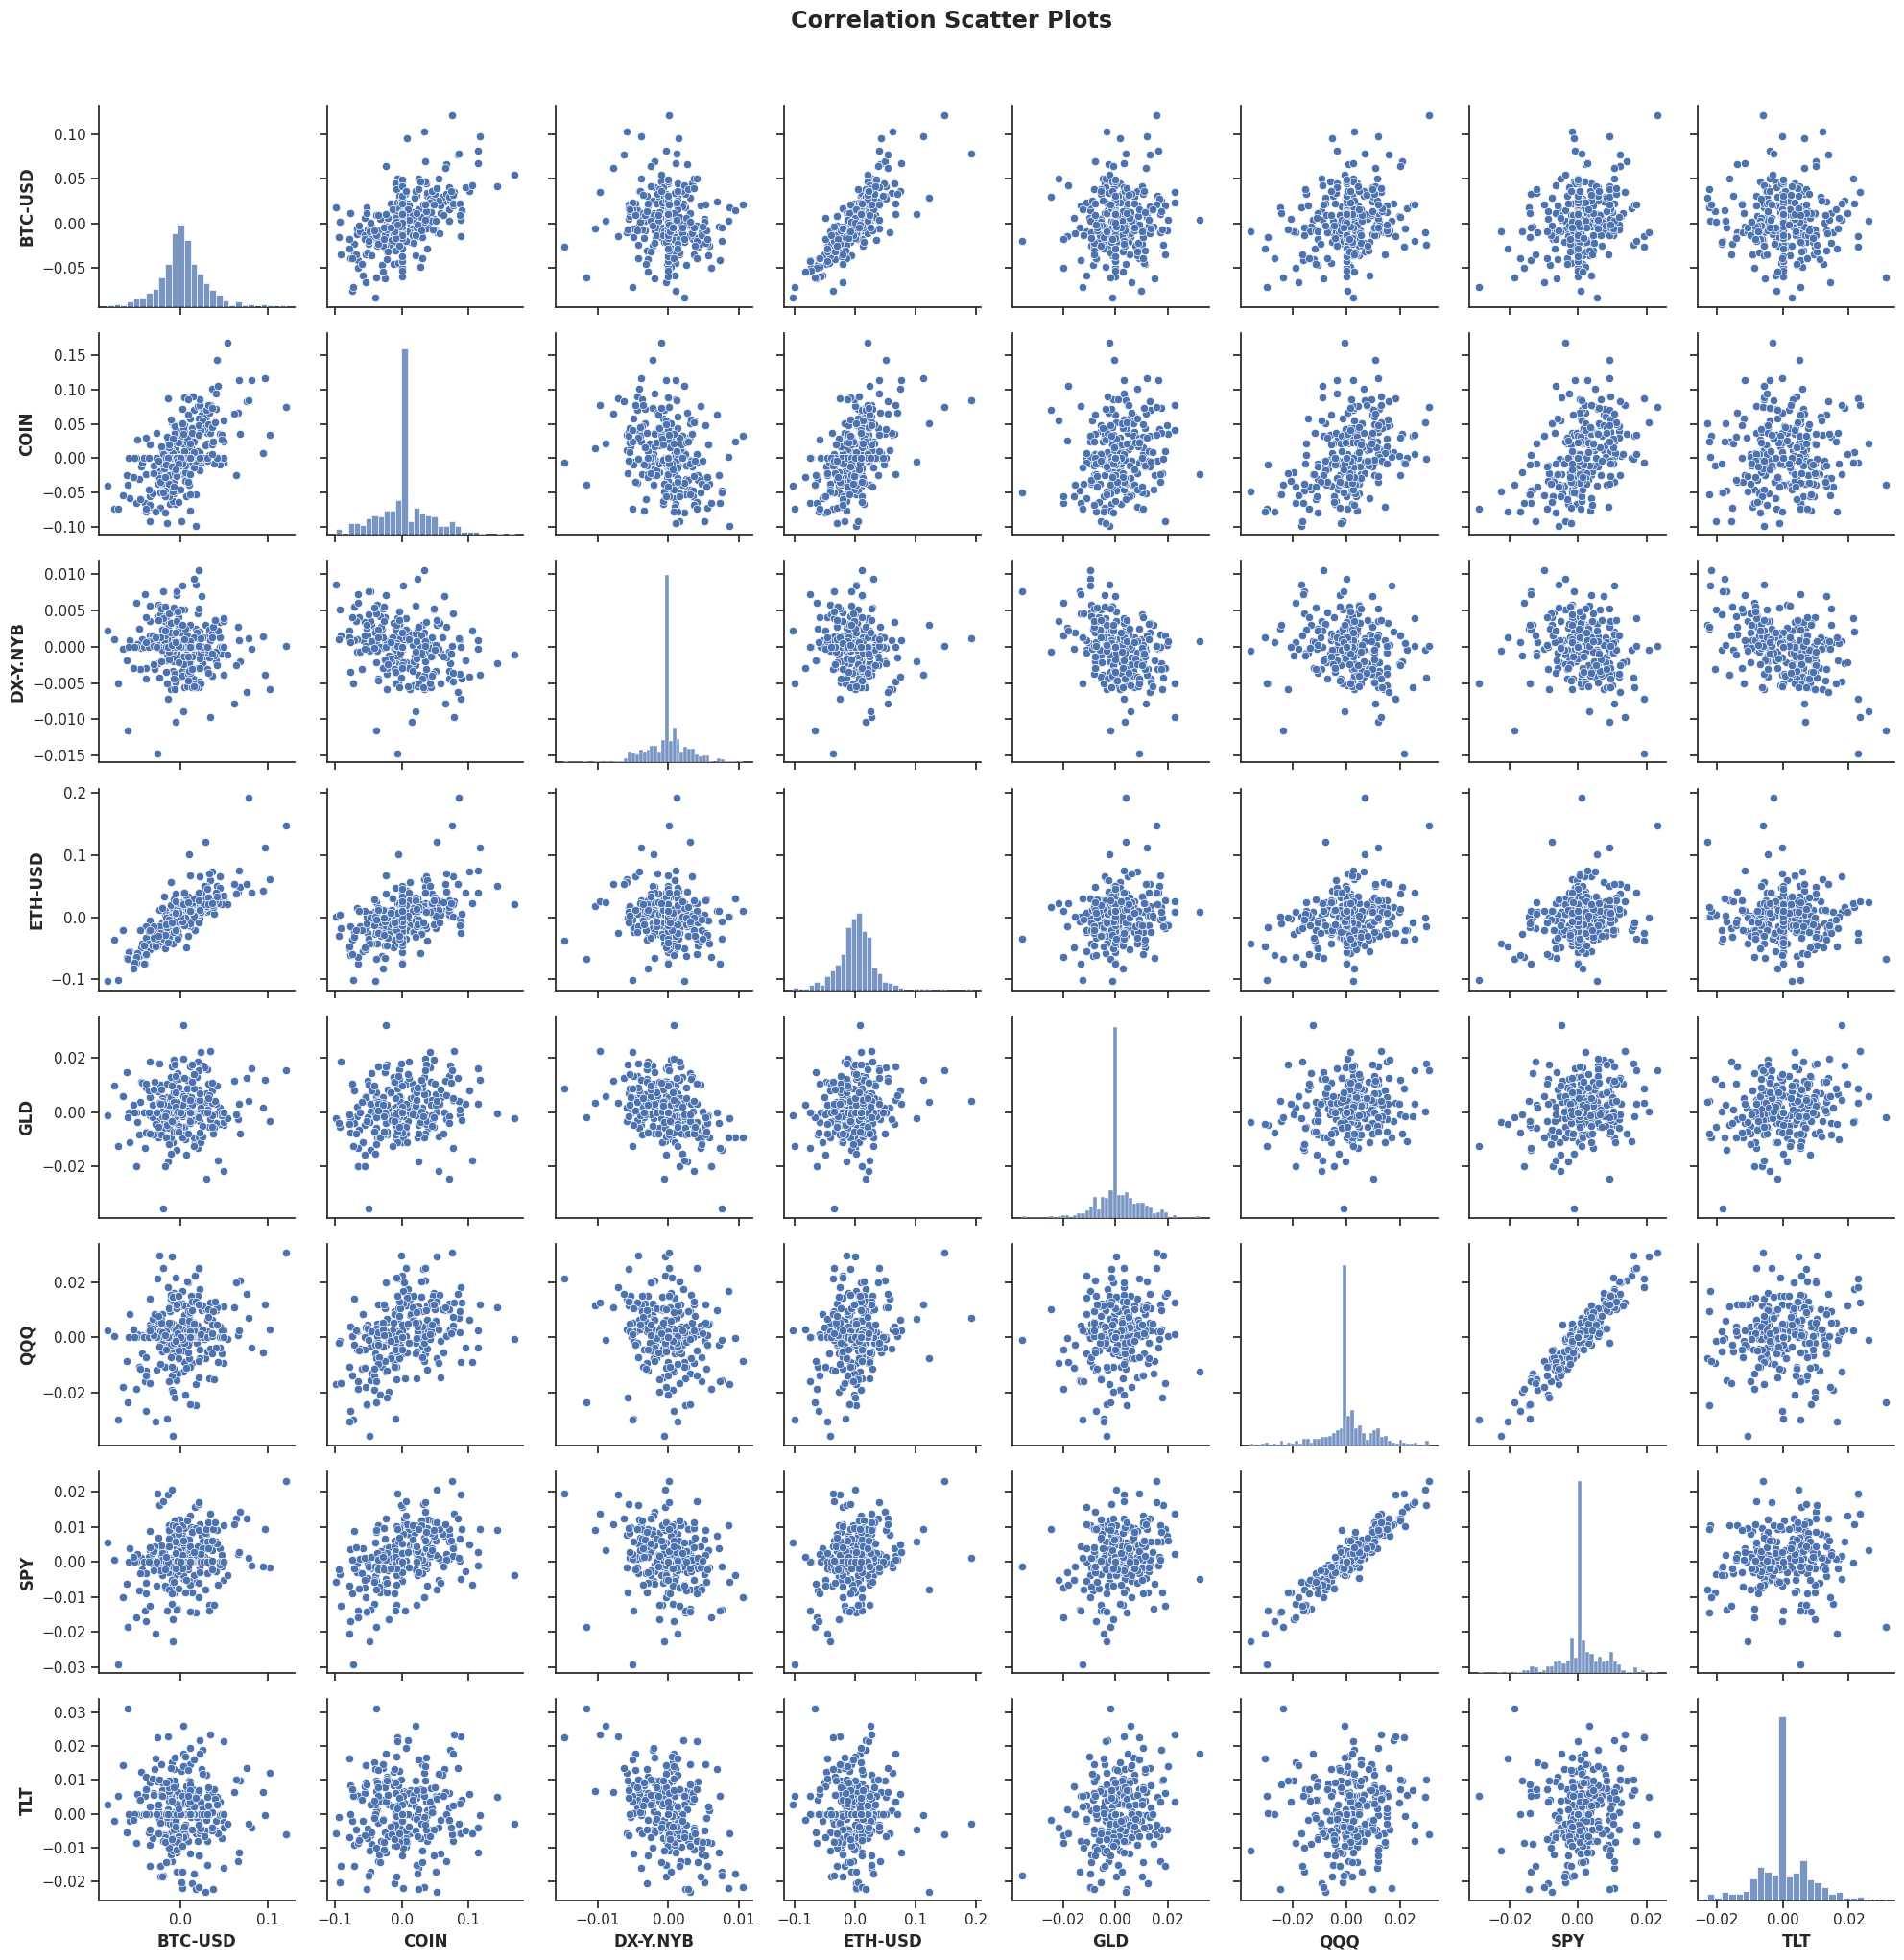

In [13]:
# @title
# Plot the scatter plots
plt.subplot(122)
sns.set(style='ticks')
sns.pairplot(returns)
plt.suptitle('Correlation Scatter Plots', y=1.02)

plt.tight_layout()
plt.show()


# Crypto

Trade Management

In [14]:
#@title Fundamentals

import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()


response = requests.get("https://api.coingecko.com/api/v3/coins/{}".format(CoinGecko_id))
output = response.text
json_parsed = json.loads(output)


x = json_parsed['market_data']['fully_diluted_valuation']

def fdv_none_val(x):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if x is None :
    fully_diluted_valuation = 0
  else :
    fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']

  return fully_diluted_valuation



def zero_div(x,y):
  """
  handling 0 division error

  """
  try:
      return x/y
  except ZeroDivisionError:
      return 0
links = 'Complete list: '+str(json_parsed['links'])
chat_url = 'Chat: '+str(json_parsed['links']['chat_url'])
CoinGecko_Link =  'CoinGecko: '+ "https://www.coingecko.com/en/coins/" + CoinGecko_id
Twitters = 'Twitter: '+str('https://twitter.com/')+str(json_parsed['links']['twitter_screen_name'])
homepage = 'Homepage: '+str(json_parsed['links']['homepage'])
subreddit_url =  'Reddit: ' +str(json_parsed['links']['subreddit_url'])
pd.set_option('display.width', 10)

print('')
print('WEB Links')
print('')
print(homepage)
print(Twitters)
print(subreddit_url)
print(chat_url)
print(CoinGecko_Link)

print(links)

print('')
print('MARKET DATA')
print('')


market_cap = json_parsed['market_data']['market_cap']['usd']
circulating_supply = json_parsed['market_data']['circulating_supply']
# circulating_supply.astype(int)
current_price = json_parsed['market_data']['current_price']['usd']
# current_price.astype(int)
fdv_to_tvl_rati = json_parsed['market_data']['fdv_to_tvl_ratio']
# fdv_to_tvl_ratio.astype(int)


#fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']['usd']

# fully_diluted_valuation
total_supply = json_parsed['market_data']['total_supply']
max_supply = json_parsed['market_data']['max_supply']
mcap_to_tvl_ratio = json_parsed['market_data']['mcap_to_tvl_ratio']
total_supply = json_parsed['market_data']['total_supply']
#total_value_locked = json_parsed['market_data']['total_value_locked']['usd']
total_volume = json_parsed['market_data']['total_volume']['usd']

float_rotation_24h = zero_div(total_volume , market_cap)
circulating_cap = current_price * json_parsed['market_data']['circulating_supply']
total_cap = current_price * total_supply


def max_cap(current_price, max_supply):
  """
    Calculation of maximum capitalization
     Requiring current price and maximum supply
  """
  if max_supply is not None :
    max_cap = current_price * max_supply
  else :
    max_cap = 0
  return max_cap

max_cap = max_cap(current_price, max_supply)



def max_supply_expansion_multiple(circulating_supply, max_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if max_supply is None :
    max_supply_expansion_multiple = 0

  elif circulating_supply ==  0:
    max_supply_expansion_multiple == 0

  else :
    max_supply_expansion_multiple = max_supply  / circulating_supply

  return max_supply_expansion_multiple


max_supply_expansion_multiple = max_supply_expansion_multiple(circulating_supply, max_supply)

def total_supply_expansion_multiple(circulating_supply, total_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if total_supply is None :
    total_supply_expansion_multiple = 0

  elif circulating_supply == 0:
    total_supply_expansion_multiple == 0

  else :
    total_supply_expansion_multiple = total_supply  / circulating_supply

  return total_supply_expansion_multiple


"""
def market_cap_dilution_ratio(fully_diluted_valuation, market_cap):


  if fully_diluted_valuation or market_cap is None :
    market_cap_dilution_ratio == 0

  elif fully_diluted_valuation or market_cap is 0:
    market_cap_dilution_ratio == 0

  elif fully_diluted_valuation or market_cap is {}:
    market_cap_dilution_ratio == 0

  else :
    market_cap_dilution_ratio =  fully_diluted_valuation / market_cap

  return market_cap_dilution_ratio


market_cap_dilution_ratio = market_cap_dilution_ratio(fully_diluted_valuation, market_cap)
"""

print('')

circulating_versus_max = circulating_supply/total_supply
dict_custom = {}
#dict_custom['total_supply_expansion_multiple'] = total_supply_expansionWhere_multiple
dict_custom['max_supply_expansion_multiple'] = max_supply_expansion_multiple
dict_custom['float_rotation_24h'] = float_rotation_24h

dict_custom['circulating_versus_max'] = circulating_versus_max


print(dict_custom)

df_market = {}
df_market['market_cap'] = market_cap
#Final been up what is on the national emergency, informative or what basket is something the P is the spaciousness up to Sarah  ankedat1['circulating_supply'] = circulating_supply
df_market['current_price'] = current_price
# df_market['fdv_to_tvl_ratio'] = fdv_to_tvl_ratio#
#df_market['fully_diluted_valuation'] = fully_diluted_valuation
# ankedat1['max_supply'] = max_supply
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_supply'] = total_supply
#df_market['total_value_locked'] = total_value_locked
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_volume'] = total_volume


print(df_market)




print('          ')
print('PRICE ACTION')
price_change_percentage_7d = json_parsed['market_data']['price_change_percentage_7d']
price_change_percentage_14d = json_parsed['market_data']['price_change_percentage_14d']
price_change_percentage_30d = json_parsed['market_data']['price_change_percentage_30d']
price_change_percentage_60d = json_parsed['market_data']['price_change_percentage_60d']
price_change_percentage_200d = json_parsed['market_data']['price_change_percentage_200d']
price_change_percentage_1y = json_parsed['market_data']['price_change_percentage_1y']



dict_return = {}
dict_return['price_change_percentage_7d'] = price_change_percentage_7d
dict_return['price_change_percentage_14d'] = price_change_percentage_14d
dict_return['price_change_percentage_30d'] = price_change_percentage_30d
dict_return['price_change_percentage_60d'] = price_change_percentage_60d
dict_return['price_change_percentage_200d'] = price_change_percentage_200d
dict_return['price_change_percentage_1y'] = price_change_percentage_1y

print(dict_return)



category = json_parsed['categories']

print('')
print('CATEGORIES')
print(category)




description  = []
pd.set_option('display.width', 10)
pd.set_option("display.max_rows", None, "display.max_columns", None)
description = json_parsed['description']['en']

print('')
print('DESCRIPTION: ')
print(description)


links = json_parsed['links']




KeyError: 'market_data'

In [ ]:

#@title Charts


import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

import seaborn as sns

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
cg = CoinGeckoAPI()

"""
1 - 2 days: 30 minutes
3 - 30 days: 4 hours
31 days and beyond: 4 days
"""
#chart  1
a = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 365 )
df  = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])
df['datetime'] = pd.to_datetime(df['Date'], unit='ms')
fig2 = go.Figure(data=[go.Candlestick(x=df['datetime'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
fig2.show()

#chart   2
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 30 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])
fig3.show()

#chart   3
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 1 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])
fig3.show()


In [ ]:
# @title
import datetime
import time
import json
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

# Initialize CoinGeckoAPI
cg = CoinGeckoAPI()

# Function to fetch OHLC data and calculate returns
def fetch_ohlc_data_and_returns(coin_id, days):
    data = cg.get_coin_ohlc_by_id(id=coin_id, vs_currency='usd', days=days)
    df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close'])
    df['datetime'] = pd.to_datetime(df['Date'], unit='ms')
    df['Returns'] = df['Close'].pct_change() * 100  # Calculate returns as percentage change
    return df

# Fetch data for different time periods
coin_id = CoinGecko_id  # Change this to your desired CoinGecko ID

# Fetch data for 1 year (365 days)
df1_year = fetch_ohlc_data_and_returns(coin_id, 365)

print(df1_year, 5)
# Plot Daily Returns Line Chart
fig_returns = go.Figure(data=go.Scatter(x=df1_year['datetime'], y=df1_year['Returns'], mode='lines',
                                        name='Daily Returns (%)'))
fig_returns.update_layout(title='4d Returns', xaxis_title='Date', yaxis_title='Returns (%)')
fig_returns.show()



# Social Metrics

In [ ]:

#@title Google Trends
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(Google_trend_search)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword], timeframe='all')


interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Google Trends interest over time
ax1.plot(interest_over_time_df.index, interest_over_time_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_title('Google Trends Interest over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest')

# Plot 2: Google Trends growth percentage
ax2.plot(interest_over_time_df.index, interest_over_time_df['percent_change'], marker='x', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_title('Google Trends Growth Percentage')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth %')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:

pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(Google_trend_search)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])


interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Google Trends interest over time
ax1.plot(interest_over_time_df.index, interest_over_time_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_title('Google Trends Interest over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest')

# Plot 2: Google Trends growth percentage
ax2.plot(interest_over_time_df.index, interest_over_time_df['percent_change'], marker='x', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_title('Google Trends Growth Percentage')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth %')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# @title

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt


# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(Google_trend_search)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword], timeframe='today 3-m')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Google Trends interest over time
ax1.plot(interest_over_time_df.index, interest_over_time_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_title('Google Trends Interest over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest')

# Rotate x-axis labels diagonally for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Google Trends growth percentage
ax2.plot(interest_over_time_df.index, interest_over_time_df['percent_change'], marker='x', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_title('Google Trends Growth Percentage')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth %')

# Adding a diagonal line for reference
ax2.plot(ax2.get_xlim(), [0, 0], color='gray', linestyle='--', linewidth=1)

# Rotate x-axis labels diagonally for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests



# Fetching Google Trends data
pytrend = TrendReq()
keyword = str(Google_trend_search).replace('-', ' ')
pytrend.build_payload(kw_list=[keyword], timeframe='today 1-m')
interest_over_time_df = pytrend.interest_over_time()

# Fetching price data from CoinGecko
def get_coin_ohlc_by_id(id, vs_currency, days):
    url = f'https://api.coingecko.com/api/v3/coins/{id}/ohlc?vs_currency={vs_currency}&days={days}'
    response = requests.get(url)
    return response.json()

b = get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days=30)
df2 = pd.DataFrame(data=b, columns=['Date', 'Open', 'High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
df2.set_index('datetime', inplace=True)

# Align the indices
interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
merged_df = df2.join(interest_over_time_df[keyword], how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Plot Google Trends data
ax1.plot(merged_df.index, merged_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_ylabel('Google Trends Interest', color='yellow')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='yellow')
# Rotate x-axis labels diagonally for better readability
ax1.set_xticks(merged_df.index)
ax1.set_xticklabels(merged_df.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

# Adding secondary y-axis for price data
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['Close'], marker='o', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_ylabel('Price (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title and show plot
plt.title(f'Google Trends and Price Data for {CoinGecko_id}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# @title
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Replace CoinGecko_id with your actual identifier


# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(Google_trend_search)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword], timeframe='now 7-d')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Google Trends interest over time
ax1.plot(interest_over_time_df.index, interest_over_time_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_title('Google Trends Interest over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest')

# Rotate x-axis labels diagonally for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Google Trends growth percentage
ax2.plot(interest_over_time_df.index, interest_over_time_df['percent_change'], marker='x', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_title('Google Trends Growth Percentage')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth %')

# Adding a diagonal line for reference
ax2.plot(ax2.get_xlim(), [0, 0], color='gray', linestyle='--', linewidth=1)

# Rotate x-axis labels diagonally for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# @title
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt




# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Replace CoinGecko_id with your actual identifier


# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(CoinGecko_id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword], timeframe='now 4-H')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Google Trends interest over time
ax1.plot(interest_over_time_df.index, interest_over_time_df[keyword], marker='x', color='yellow', linestyle='-', linewidth=1, ms=1.5)
ax1.set_title('Google Trends Interest over Time')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Interest')



# Rotate x-axis labels diagonally for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Google Trends growth percentage
ax2.plot(interest_over_time_df.index, interest_over_time_df['percent_change'], marker='x', color='red', linestyle='-', linewidth=1, ms=1.5)
ax2.set_title('Google Trends Growth Percentage')
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Growth %')


# Adding a diagonal line for reference
ax2.plot(ax2.get_xlim(), [0, 0], color='gray', linestyle='--', linewidth=1)

# Rotate x-axis labels diagonally for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


## Correlation Analysis: Price versus Google Trends

In [ ]:
# @title
import datetime
import time
import json
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Initialize CoinGeckoAPI
cg = CoinGeckoAPI()

days =  30

data = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days=days)
df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close'])
df['datetime'] = pd.to_datetime(df['Date'], unit='ms')
df['Returns'] = df['Close'].pct_change() * 100  # Calculate returns as percentage change

keyword = str(CoinGecko_id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword], timeframe='today 3-m')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()

# Calculate growth of Google Trends score
interest_over_time_df['percent_change'] = interest_over_time_df[keyword].pct_change()


# Concatenate the two dataframes along axis=1 (columns)
df_concatenated = pd.concat([df.set_index('datetime'), interest_over_time_df], axis=1)


# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_concatenated['Returns'], df_concatenated[CoinGecko_id], alpha=0.5)
plt.title('Ethereum Daily Returns vs Normalized Google Trends')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Google Trends Interest')
plt.grid(True)
plt.show()


In [ ]:
# @title
import requests
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns


# Step 3: Process and align the data
#data = pd.merge(eth_prices, google_trends, left_index=True, right_index=True, how='inner')

# Step 4: Correlation Analysis
correlation = df_concatenated.corr()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation between Ethereum Price and Google Trends Score')
plt.show()

